# Porirua spatial analysis

In [63]:
# Install support package and dependencies 
!pip install --upgrade -e ../.

# Ensure access to packge for imports
import sys
sys.path.append('../')

Obtaining file:///home/jovyan/work/osm/osmnx-catchments
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Attempting uninstall: osmcatch
    Found existing installation: osmcatch 0.0.1
    Uninstalling osmcatch-0.0.1:
      Successfully uninstalled osmcatch-0.0.1
  Running setup.py develop for osmcatch


## Get walk network and slope

We obtain the walk network from OpenStreetMaps using the `osmnx` and `osmnxcatch` Python libraries for the Porirua City using StatsNZ local authority boundary. The walk network is defined using the following osm tags and is extracted for a specified date for repeatability.

```
walk_highways = '["area"!~"yes"]["highway"]' + \
    '["highway"!~"motorway"]' + \
    '["highway"!~"motorway_junction"]' + \
    '["highway"!~"traffic_signals"]["highway"!~"give_way"]' + \
    '["foot"!~"no"]' + \
    '["sidewalk"!~"no|separate"]["area"!~"yes"]'
walk_footways = '["area"!~"yes"]["footway"]'
```

NB: The osm walking network and tags have been reviewed as part of this process. THe areas around Porirua city centre, Porirua Station and Kenepuru Station have been reviewed to date and updated to ensure the above tags return an accurate walk network. 


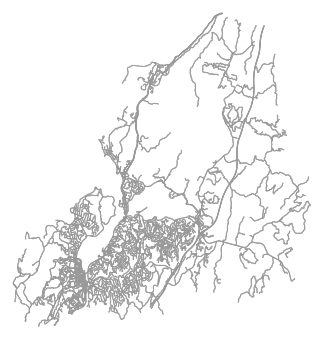

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

In [68]:
from osmcatch import network
import osmnx as ox

# Define point within Porirua
access_point = (-41.1377659, 174.8432213) # Porirua Station Entrance 1

# Get local authority walk network
G = network.get_osm_walk_network(access_point, 
                                 snapshot_date="2021-06-01T12:00:00Z",
                                 return_local_authority_network=True)

# Optional, plot network
ox.plot_graph(G, bgcolor="white", node_size=0, figsize=(6,6))

Once we get the walk network we want to determine the slopes which we be used to adjust walk speeds. We used the LINZ [Wellington region DEM 2013/14](https://data.linz.govt.nz/layer/53621-wellington-lidar-1m-dem-2013-2014/) dataset for this purpose. Due to the number of data points there is no suiable API to query the DEM data directly. The DEM data was downloaded for area `Territorial Authorities = "Porirua City"` using `crs=2193` and saved to a local folder `/spatial_data/linz_dem_2013_porirua`. This is not included in version control as around 700MB in size.


In [69]:
from pathlib import Path

# Path to raster data 
dem_path = 'spatial_data/linz_dem_2013_porirua'
p = Path.home().joinpath(Path(dem_path))

elevations = elevation.add_elevations_to_graph(G, P, raster_crs='epsg:21')



In [71]:


add_elevations_to_graph(G, 
                          raster_path, 
                          raster_crs=None)

AttributeError: 'PosixPath' object has no attribute 'list'